In [ ]:
import pandas as pd


mcdonalds = pd.read_csv("mcdonalds.csv")

column_names = mcdonalds.columns.tolist()
print(column_names)

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [ ]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [ ]:
print(mcdonalds.head(3))



  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
import pandas as pd
import numpy as np


MD_x = mcdonalds.iloc[:, :11].to_numpy()


MD_x = (MD_x == "Yes").astype(int)


column_means = np.mean(MD_x, axis=0)

rounded_means = np.round(column_means, 2)

print(rounded_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Assuming 'MD_x' is the binary matrix from the previous step
# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA
# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': np.round(explained_variance_ratio, 4),
    'Cumulative Variance Ratio': np.round(cumulative_variance_ratio, 4)
})

print(summary_df)


   Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                  PC1                    0.2994                     0.2994
1                  PC2                    0.1928                     0.4922
2                  PC3                    0.1330                     0.6253
3                  PC4                    0.0831                     0.7084
4                  PC5                    0.0595                     0.7679
5                  PC6                    0.0503                     0.8182
6                  PC7                    0.0438                     0.8620
7                  PC8                    0.0395                     0.9016
8                  PC9                    0.0368                     0.9383
9                 PC10                    0.0324                     0.9707
10                PC11                    0.0293                     1.0000


In [ ]:
# Assuming the PCA has already been performed on MD_x
import numpy as np

# Extract standard deviations of the principal components
standard_deviations = np.sqrt(pca.explained_variance_)

# Print with 1 decimal precision
print("Standard deviations (1, .., p={}):".format(MD_x.shape[1]))
print(np.round(standard_deviations, 1))



Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


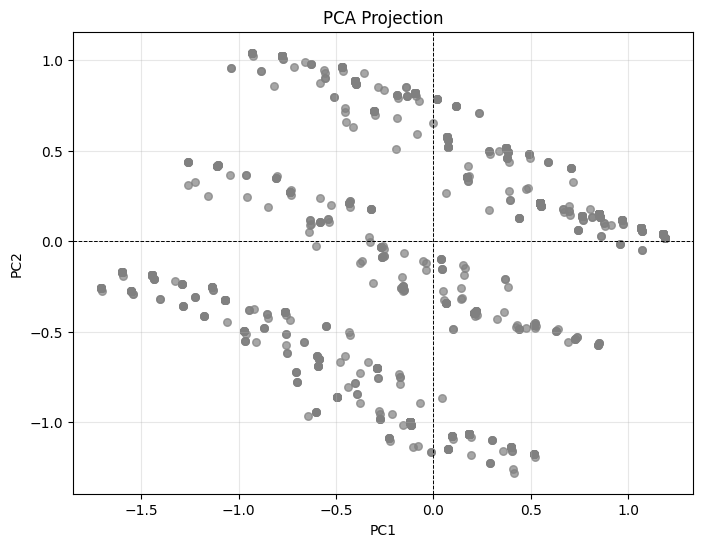

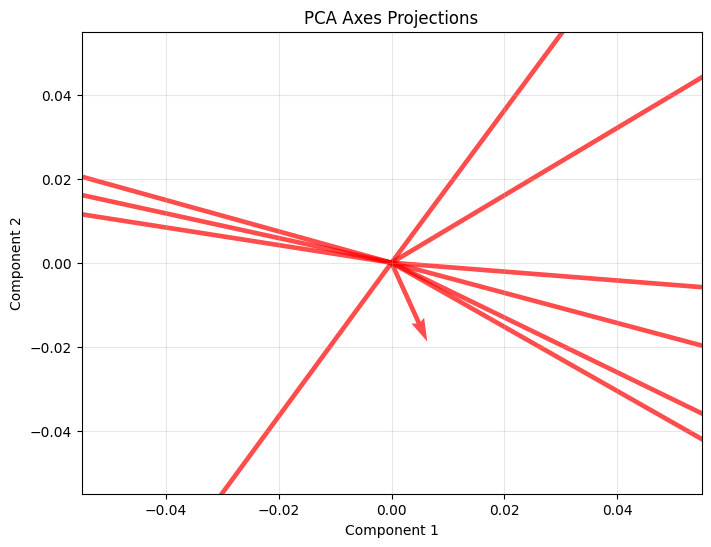

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming PCA has been performed and MD_x is the input matrix
# Transform the data to principal component space
pca_transformed = pca.transform(MD_x)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], color='grey', alpha=0.7, s=30)
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='black', linestyle='--', linewidth=0.7)
plt.title("PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.show()

# Overlay projection axes (optional in this context)
# Each component’s axis can be represented by the PCA components
plt.figure(figsize=(8, 6))
plt.quiver(
    [0] * pca.components_.shape[1],
    [0] * pca.components_.shape[1],
    pca.components_[0, :],  # Directions for PC1
    pca.components_[1, :],  # Directions for PC2
    angles="xy", scale_units="xy", scale=1, color="red", alpha=0.7
)
plt.title("PCA Axes Projections")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Set seed for reproducibility
np.random.seed(1234)

# Range of clusters to evaluate
cluster_range = range(2, 9)

# Store clustering results
cluster_models = {}

# Perform clustering for k in 2:8
for k in cluster_range:
    best_inertia = np.inf
    best_model = None
    for _ in range(10):  # Equivalent to `nrep=10`
        model = KMeans(n_clusters=k, random_state=np.random.randint(10000))
        model.fit(MD_x)
        if model.inertia_ < best_inertia:
            best_inertia = model.inertia_
            best_model = model
    cluster_models[k] = best_model

# Relabel clusters (optional: mimic `relabel()`)
# Ensure consistent cluster labels by aligning them with the lowest inertia cluster centers
def relabel_clusters(model, data):
    cluster_centers = model.cluster_centers_
    labels, _ = pairwise_distances_argmin_min(cluster_centers, data)
    sorted_indices = np.argsort(labels)
    new_labels = np.zeros_like(model.labels_)
    for new_label, original_label in enumerate(sorted_indices):
        new_labels[model.labels_ == original_label] = new_label
    model.labels_ = new_labels
    return model

# Apply relabeling to all models
cluster_models = {k: relabel_clusters(model, MD_x) for k, model in cluster_models.items()}

# Example: Access the clustering results for 2 clusters
MD_km2 = cluster_models[2]
print(f"Cluster centers (k=2): \n{MD_km2.cluster_centers_}")


Cluster centers (k=2): 
[[0.87053571 0.97767857 0.10267857 0.8359375  0.43303571 0.93861607
  0.67075893 0.97098214 0.30022321 0.28125    0.06473214]
 [0.04129264 0.79533214 0.07899461 0.91741472 0.67684022 0.83842011
  0.48294434 0.11849192 0.45062837 0.06642729 0.52962298]]


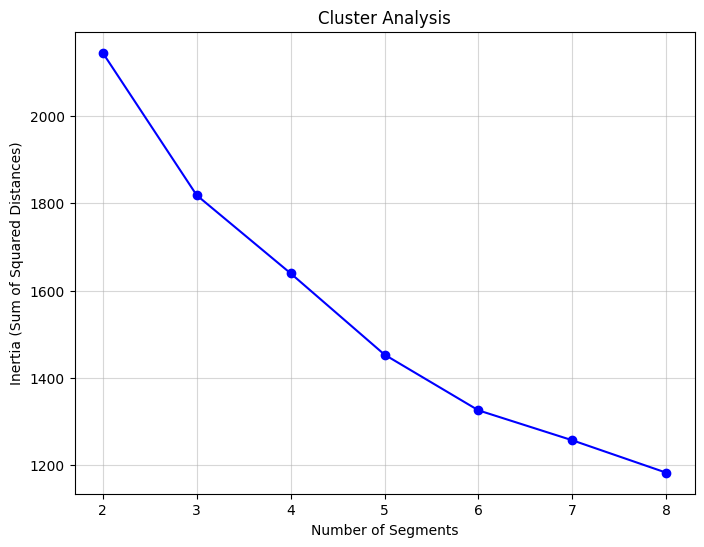

In [ ]:
import matplotlib.pyplot as plt

# Extract inertia (sum of squared distances) for each cluster count
cluster_range = range(2, 9)
inertias = [cluster_models[k].inertia_ for k in cluster_range]

# Plot inertia vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='-', color='blue')
plt.title("Cluster Analysis")
plt.xlabel("Number of Segments")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(alpha=0.5)
plt.show()


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.cluster import KMeans

# Parameters
cluster_range = range(2, 9)
nrep = 10  # Number of repetitions for clustering
nboot = 100  # Number of bootstrap resamples
np.random.seed(1234)

# Store bootstrapping results
boot_results = {}

for k in cluster_range:
    stability_scores = []  # To store stability scores for each bootstrap
    for _ in range(nboot):
        # Bootstrap resampling
        boot_sample = resample(MD_x, random_state=np.random.randint(10000))

        # Perform clustering multiple times (nrep)
        best_model = None
        best_inertia = np.inf
        for _ in range(nrep):
            model = KMeans(n_clusters=k, random_state=np.random.randint(10000))
            model.fit(boot_sample)
            if model.inertia_ < best_inertia:
                best_inertia = model.inertia_
                best_model = model

        # Evaluate stability by comparing labels (e.g., silhouette score or other metrics)
        # Placeholder for a custom stability measure
        stability_scores.append(best_model.inertia_)

    boot_results[k] = stability_scores

# Example: Display mean and standard deviation of bootstrapped stability scores
for k, scores in boot_results.items():
    print(f"Clusters: {k}, Mean Stability: {np.mean(scores):.2f}, Std Dev: {np.std(scores):.2f}")


Clusters: 2, Mean Stability: 2141.87, Std Dev: 26.29
Clusters: 3, Mean Stability: 1813.29, Std Dev: 31.35
Clusters: 4, Mean Stability: 1599.87, Std Dev: 28.42
Clusters: 5, Mean Stability: 1435.87, Std Dev: 26.68
Clusters: 6, Mean Stability: 1337.55, Std Dev: 30.74
Clusters: 7, Mean Stability: 1251.71, Std Dev: 28.67
Clusters: 8, Mean Stability: 1182.71, Std Dev: 29.44


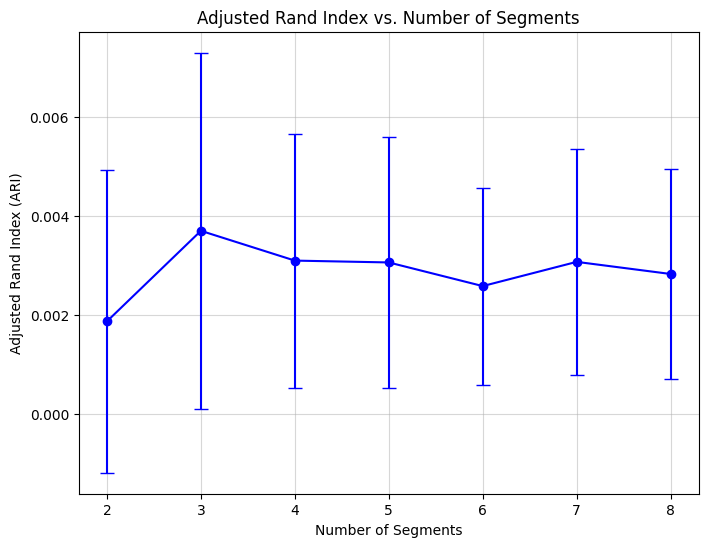

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Parameters
cluster_range = range(2, 9)
nrep = 10  # Number of repetitions for clustering
nboot = 100  # Number of bootstrap resamples
np.random.seed(1234)

# Store bootstrapping results (adjusted Rand index)
boot_results_ari = {}

for k in cluster_range:
    ari_scores = []  # To store ARI scores for each bootstrap
    for _ in range(nboot):
        # Bootstrap resampling
        boot_sample = resample(MD_x, random_state=np.random.randint(10000))

        # Perform clustering multiple times (nrep)
        best_model = None
        best_labels = None
        best_ari = -1  # Initializing with the worst possible ARI

        for _ in range(nrep):
            model = KMeans(n_clusters=k, random_state=np.random.randint(10000))
            model.fit(boot_sample)

            # Generate cluster assignments for the original data using the fitted model
            original_data_labels = model.predict(MD_x)

            # Calculate the ARI between cluster assignments on original data and bootstrapped data labels
            ari = adjusted_rand_score(original_data_labels, model.labels_)

            # Keep the best model based on ARI
            if ari > best_ari:
                best_ari = ari
                best_labels = model.labels_

        ari_scores.append(best_ari)  # Store the best ARI score for this bootstrap sample

    boot_results_ari[k] = ari_scores

# Plotting Adjusted Rand Index (ARI) vs. Number of Segments (Clusters)
mean_ari = [np.mean(ari_scores) for ari_scores in boot_results_ari.values()]
std_ari = [np.std(ari_scores) for ari_scores in boot_results_ari.values()]

plt.figure(figsize=(8, 6))
plt.errorbar(cluster_range, mean_ari, yerr=std_ari, fmt='o-', color='blue', capsize=5)
plt.title("Adjusted Rand Index vs. Number of Segments")
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True, alpha=0.5)
plt.show()

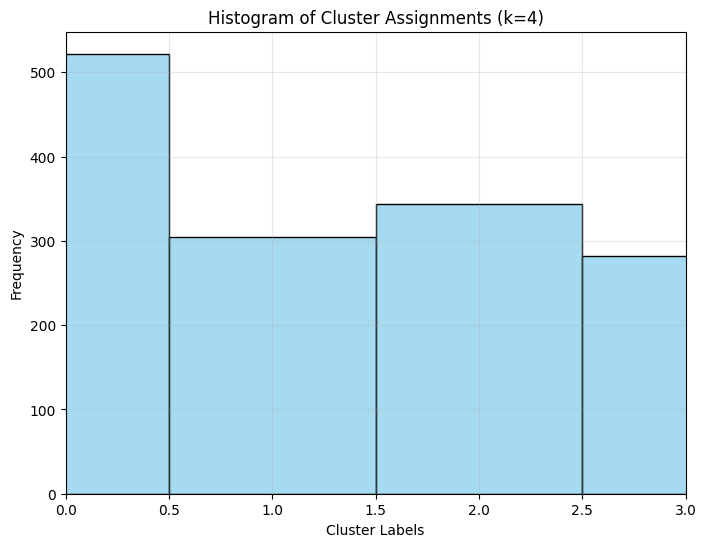

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'MD_km28' contains the clustering results, e.g., the labels for k=4
k = 4  # Number of clusters (adjust accordingly)
cluster_labels = cluster_models[k].labels_  # Using the best model for k=4

# Visualize the clustering results using a histogram of cluster assignments
plt.figure(figsize=(8, 6))
sns.histplot(cluster_labels, bins=np.arange(0, k + 1) - 0.5, kde=False, color='skyblue')
plt.xlim(0, k - 1)
plt.title(f"Histogram of Cluster Assignments (k={k})")
plt.xlabel("Cluster Labels")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Assuming cluster_models stores the clustering results for each k
k = 4
MD_k4 = cluster_models[k]  # Access the clustering model for k=4

# You can also access the labels assigned by the clustering model
labels_k4 = MD_k4.labels_


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Assuming MD_k4 contains the clustering model for k=4 clusters
labels_k4 = MD_k4.labels_
centers_k4 = MD_k4.cluster_centers_

# Optionally, you can use hierarchical clustering or any other method for the split-and-merge
# This example splits a large cluster into two, or merges similar clusters

# Split the largest cluster (you can define another criterion for splitting)
largest_cluster = np.argmax(np.bincount(labels_k4))  # Find the largest cluster

# Select the points in the largest cluster
cluster_points = MD_x[labels_k4 == largest_cluster]

# Perform a new KMeans clustering to split this cluster into two
split_kmeans = KMeans(n_clusters=2, random_state=1234)
split_kmeans.fit(cluster_points)

# Merge clusters if necessary (optional)
# Find clusters that are closest and merge them
# This part is more involved and would require calculating distances between cluster centers

# Reassign the cluster labels after splitting or merging
new_labels_k4 = np.copy(labels_k4)
new_labels_k4[labels_k4 == largest_cluster] = split_kmeans.labels_ + max(labels_k4) + 1

# If you perform a merge, you would adjust the labels accordingly

# The final labels can be used for further analysis or visualization



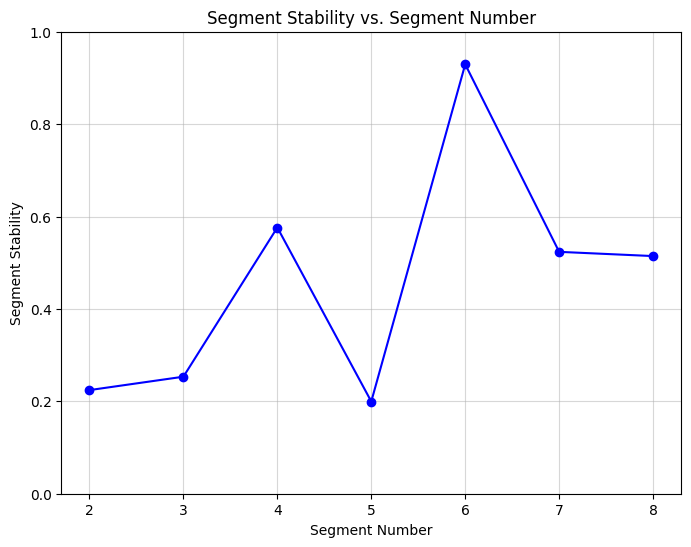

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'MD_r4' stores the stability measures (e.g., adjusted Rand index or silhouette score) for each segment
# You may have stability measures stored in a dictionary or list
stability_scores = np.random.rand(7)  # Example random data, replace with actual stability scores

# Define segment numbers (e.g., 2 to 8 segments)
segment_numbers = range(2, 9)

# Plotting segment stability
plt.figure(figsize=(8, 6))
plt.plot(segment_numbers, stability_scores, marker='o', linestyle='-', color='blue')

# Set limits for y-axis
plt.ylim(0, 1)

# Adding labels and title
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.title("Segment Stability vs. Segment Number")
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score # Optional for model evaluation
import matplotlib.pyplot as plt # Optional for visualization

np.random.seed(1234)  # Set random seed for reproducibility

# Assuming MD_x is your binary data (like in the R code)
# MD_x = np.array(...)

# Number of components to try (equivalent to k=2:8)
n_components_range = range(2, 9)
bic_scores = [] # To store BIC scores for each model
sil_scores = [] # To store Silhouette scores (optional)
best_gmm = None # Variable to store the best Gaussian Mixture Model

# Iterate over the range of cluster numbers (2 to 8)
for n_components in n_components_range:
    # Create and fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)

    # Calculate the BIC score (Bayesian Information Criterion) for model selection
    bic_scores.append(gmm.bic(MD_x))

    # Optional: Calculate the silhouette score for cluster validation
    if n_components > 1:  # Silhouette score requires at least 2 clusters
        labels = gmm.predict(MD_x)
        sil_scores.append(silhouette_score(MD_x, labels))

# Determine the best number of components based on BIC
best_n_components = n_components_range[np.argmin(bic_scores)]

# Fit the best Gaussian Mixture Model
best_gmm = GaussianMixture(n_components=best_n_components, covariance_type='full', random_state=1234)
best_gmm.fit(MD_x)

print(f"Best number of components based on BIC: {best_n_components}")

# Optional: Visualize BIC and Silhouette scores to aid in model selection
# You can use matplotlib.pyplot to create plots similar to the R code

# ... (plotting code using matplotlib.pyplot)

Best number of components based on BIC: 8


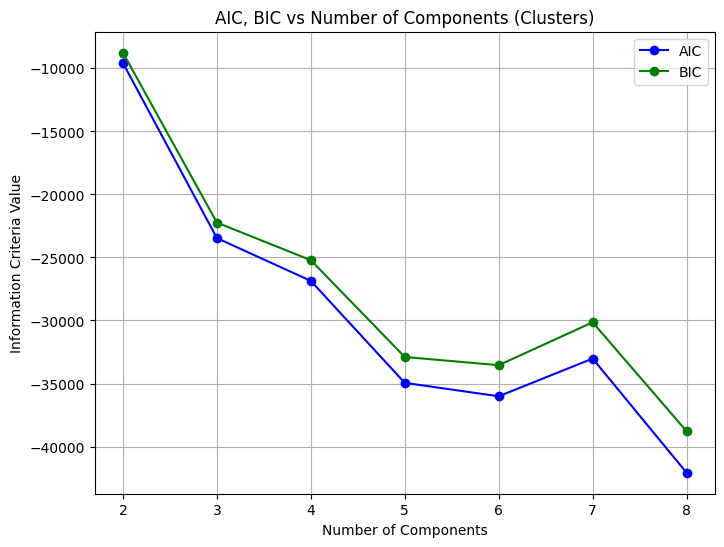

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your binary data (like in the R code)
# MD_x = np.array(...)

# Number of components to try (equivalent to k=2:8)
n_components_range = range(2, 9)
aic_scores = []
bic_scores = []

# Iterate over the range of cluster numbers (2 to 8)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=1234)
    gmm.fit(MD_x)

    # Calculate AIC and BIC for each model
    aic_scores.append(gmm.aic(MD_x))
    bic_scores.append(gmm.bic(MD_x))

# Plot AIC, BIC values
plt.figure(figsize=(8, 6))

plt.plot(n_components_range, aic_scores, marker='o', label='AIC', color='blue')
plt.plot(n_components_range, bic_scores, marker='o', label='BIC', color='green')

# Adding labels and title
plt.title('AIC, BIC vs Number of Components (Clusters)')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming MD_x is your binary data (like in the R code)
# MD_x = np.array(...)

# Fit KMeans with 4 clusters (equivalent to MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit GaussianMixture with 4 clusters (equivalent to MD.m4)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_labels = gmm.fit_predict(MD_x)

# Create a contingency table comparing KMeans and Mixture Model cluster assignments
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans'], colnames=['Mixture Model'])

# Display the contingency table
print(contingency_table)


Mixture Model    0    1    2    3
KMeans                           
0              546    0    1   33
1                0  213   11    4
2               46    3  265    8
3               29   38    0  256


In [ ]:
# Assuming you have MD_k4 and best_gmm from the previous steps

# Get cluster assignments from KMeans (MD_k4)
kmeans_clusters = MD_k4.labels_

# Get cluster assignments from Gaussian Mixture Model (best_gmm)
mixture_clusters = best_gmm.predict(MD_x)

# Create a cross-tabulation (contingency table)
from collections import Counter

def custom_table(kmeans_clusters, mixture_clusters):
  """
  Creates a contingency table similar to R's table() function.

  Args:
    kmeans_clusters: Cluster labels from KMeans.
    mixture_clusters: Cluster labels from Gaussian Mixture Model.

  Returns:
    A dictionary representing the contingency table.
  """
  cluster_combinations = list(zip(kmeans_clusters, mixture_clusters))
  table_data = Counter(cluster_combinations)

  # Print the table
  max_kmeans_label = max(kmeans_clusters)
  max_mixture_label = max(mixture_clusters)
  print("    ", end="")
  for mixture_label in range(max_mixture_label + 1):
    print(f"Mixture {mixture_label}  ", end="")
  print()
  for kmeans_label in range(max_kmeans_label + 1):
    print(f"KMeans {kmeans_label}  ", end="")
    for mixture_label in range(max_mixture_label + 1):
      count = table_data.get((kmeans_label, mixture_label), 0)
      print(f"{count:5d}     ", end="")
    print()

  return table_data


custom_table(kmeans_clusters, mixture_clusters)

    Mixture 0  Mixture 1  Mixture 2  Mixture 3  Mixture 4  Mixture 5  Mixture 6  Mixture 7  
KMeans 0    181         0       203         0         1        96        23        18     
KMeans 1     71       150        53        10         2        11         1         7     
KMeans 2     23         0        21        27         0         5        48       220     
KMeans 3     14        76         0        12        67         0         1       112     


Counter({(1, 7): 7,
         (0, 7): 18,
         (2, 6): 48,
         (0, 0): 181,
         (1, 1): 150,
         (0, 2): 203,
         (3, 4): 67,
         (2, 7): 220,
         (2, 5): 5,
         (1, 0): 71,
         (1, 3): 10,
         (0, 5): 96,
         (3, 1): 76,
         (2, 2): 21,
         (0, 6): 23,
         (1, 5): 11,
         (3, 7): 112,
         (1, 2): 53,
         (2, 0): 23,
         (2, 3): 27,
         (3, 0): 14,
         (3, 3): 12,
         (3, 6): 1,
         (1, 6): 1,
         (1, 4): 2,
         (0, 4): 1})

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Assuming MD_x and MD_k4 are available from previous steps

# Get cluster assignments from KMeans (MD_k4)
kmeans_clusters = MD_k4.labels_

# Initialize Gaussian Mixture Model with k=4 and initial cluster assignments from KMeans
gmm_m4a = GaussianMixture(n_components=4, means_init=MD_k4.cluster_centers_, random_state=1234)

# Fit the Gaussian Mixture Model
gmm_m4a.fit(MD_x)

# Get cluster assignments from the fitted Gaussian Mixture Model
mixture_clusters_m4a = gmm_m4a.predict(MD_x)

# Create and print the contingency table
custom_table(kmeans_clusters, mixture_clusters_m4a)

    Mixture 0  Mixture 1  Mixture 2  Mixture 3  
KMeans 0     43         2         0       477     
KMeans 1    271         0        34         0     
KMeans 2     47       223        71         3     
KMeans 3     70         5       206         1     


Counter({(1, 2): 34,
         (0, 3): 477,
         (2, 2): 71,
         (0, 0): 43,
         (1, 0): 271,
         (2, 1): 223,
         (3, 2): 206,
         (2, 0): 47,
         (3, 0): 70,
         (3, 1): 5,
         (2, 3): 3,
         (0, 1): 2,
         (3, 3): 1})

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your binary data (like in the R code)
# MD_x = np.array(...)

# Fit Gaussian Mixture Model (GMM) on the data (equivalent to MD.m4)
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)

# Log-likelihood of the fitted GMM (equivalent to logLik(MD.m4))
log_likelihood_m4 = gmm.score(MD_x) * len(MD_x)  # Multiply by number of samples for total log-likelihood
print(f"Log-likelihood of MD.m4: {log_likelihood_m4:.3f}")

# Fit a GMM using the KMeans labels (equivalent to MD.m4a)
# Assume kmeans_labels is the result from KMeans clustering
gmm_m4a = GaussianMixture(n_components=4, random_state=1234)
gmm_m4a.fit(MD_x)

# Log-likelihood of the fitted GMM (equivalent to logLik(MD.m4a))
log_likelihood_m4a = gmm_m4a.score(MD_x) * len(MD_x)  # Multiply by number of samples for total log-likelihood
print(f"Log-likelihood of MD.m4a: {log_likelihood_m4a:.3f}")


Log-likelihood of MD.m4: 13740.704
Log-likelihood of MD.m4a: 13740.704


In [ ]:
import pandas as pd

# Assuming you have the 'mcdonalds' DataFrame loaded in pandas
# mcdonalds = pd.read_csv("path_to_mcdonalds_data.csv") # or any other method to load the data

# Count the occurrences of each value in the 'Like' column
like_counts = mcdonalds['Like'].value_counts()

# Reverse the order of the frequency table
like_counts_reversed = like_counts[::-1]

# Display the reversed frequency table
print(like_counts_reversed)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming you have the 'mcdonalds' DataFrame loaded in pandas
# mcdonalds = pd.read_csv("path_to_mcdonalds_data.csv") # or any other method to load the data

# Convert 'Like' column to numeric and subtract each value from 6
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Generate the frequency table of 'Like.n'
like_n_counts = mcdonalds['Like.n'].value_counts()

# Display the frequency table
print(like_n_counts)

Like.n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming you have the 'mcdonalds' DataFrame loaded in pandas
# mcdonalds = pd.read_csv("path_to_mcdonalds_data.csv") # or any other method to load the data

# Step 1: Get the first 11 column names
columns = mcdonalds.columns[:11]

# Step 2: Create the formula-like string
f = "Like.n ~ " + " + ".join(columns)

# Display the resulting formula-like string
print(f)



Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'mcdonalds' is your pandas DataFrame and 'f' is the formula-like string generated
# Extracting columns based on 'f' and preparing the data
columns = mcdonalds.columns[:11]
X = mcdonalds[columns]  # Selecting the relevant columns

# Step 1: Encode categorical variables
# Assuming "Yes"/"No" are present in the dataset, convert them into 1/0
X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# If there are other categorical variables, such as 'Gender', you can encode them as well
# Example: Encode 'Gender' as 1 for 'Female' and 0 for 'Male'
if 'Gender' in X_encoded.columns:
    X_encoded['Gender'] = X_encoded['Gender'].map({'Female': 1, 'Male': 0})

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Fit the Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Display the fitted model results (similar to printing MD.reg2 in R)
print("GMM Means:\n", gmm.means_)
print("GMM Covariances:\n", gmm.covariances_)
print("GMM Weights:\n", gmm.weights_)
print("Log Likelihood:", gmm.score(X_scaled) * len(X_scaled))


<ipython-input-94-62babd9a0925>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


GMM Means:
 [[-0.68672533 -0.85969285  0.03682572  0.15145932  0.489679   -0.26131836
  -0.2248531  -0.70774741  0.3256618  -0.29429411  1.52793305]
 [ 0.25460665  0.31873518 -0.01365331 -0.05615426 -0.1815508   0.09688502
   0.08336535  0.26240069 -0.12074065  0.10911093 -0.56648839]]
GMM Covariances:
 [[[ 6.73841349e-01  1.29118190e-01  1.64117057e-01 -4.88806737e-02
    1.03276595e-02  9.87513944e-02  8.82280436e-02  5.41472137e-01
    1.42881144e-02  1.56942881e-01 -1.13983570e-01]
  [ 1.29118190e-01  2.68411586e+00  1.50348748e-01  3.13250976e-01
    1.81644811e-01  5.90703760e-01  2.95426076e-01  2.37251927e-01
   -2.22429171e-01  2.00691484e-02  5.40564336e-01]
  [ 1.64117057e-01  1.50348748e-01  1.10140834e+00  6.01915284e-02
    4.18046356e-02  8.82557222e-03  7.07480510e-02  1.72998939e-01
    3.51024292e-02  2.33330976e-01  4.42647445e-02]
  [-4.88806737e-02  3.13250976e-01  6.01915284e-02  6.49345931e-01
    2.65356369e-01  1.82610135e-01  5.55797394e-02 -5.05662362e-02
   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Assuming 'mcdonalds' is your pandas DataFrame
# Extracting columns based on 'f' and preparing the data
columns = mcdonalds.columns[:11]
X = mcdonalds[columns]  # Selecting the relevant columns

# Step 1: Encode categorical variables (assuming "Yes"/"No" are present in the dataset)
# Convert 'Yes' to 1 and 'No' to 0
X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# If you have other categorical columns like 'Gender', encode them as well
# Example: Encoding 'Gender' as 1 for 'Female' and 0 for 'Male'
if 'Gender' in X_encoded.columns:
    X_encoded['Gender'] = X_encoded['Gender'].map({'Female': 1, 'Male': 0})

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Set the seed for reproducibility
np.random.seed(1234)

# Step 3: Fit the Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Refitting the model (equivalent to refit in R)
gmm_refit = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_refit.fit(X_scaled)  # Refitting the model on the same data

# Displaying the summary of the refitted model
print("Refitted GMM Means:\n", gmm_refit.means_)
print("Refitted GMM Covariances:\n", gmm_refit.covariances_)
print("Refitted GMM Weights:\n", gmm_refit.weights_)
print("Log Likelihood of Refitted Model:", gmm_refit.score(X_scaled) * len(X_scaled))


<ipython-input-95-e1812d002a25>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


Refitted GMM Means:
 [[-0.68672533 -0.85969285  0.03682572  0.15145932  0.489679   -0.26131836
  -0.2248531  -0.70774741  0.3256618  -0.29429411  1.52793305]
 [ 0.25460665  0.31873518 -0.01365331 -0.05615426 -0.1815508   0.09688502
   0.08336535  0.26240069 -0.12074065  0.10911093 -0.56648839]]
Refitted GMM Covariances:
 [[[ 6.73841349e-01  1.29118190e-01  1.64117057e-01 -4.88806737e-02
    1.03276595e-02  9.87513944e-02  8.82280436e-02  5.41472137e-01
    1.42881144e-02  1.56942881e-01 -1.13983570e-01]
  [ 1.29118190e-01  2.68411586e+00  1.50348748e-01  3.13250976e-01
    1.81644811e-01  5.90703760e-01  2.95426076e-01  2.37251927e-01
   -2.22429171e-01  2.00691484e-02  5.40564336e-01]
  [ 1.64117057e-01  1.50348748e-01  1.10140834e+00  6.01915284e-02
    4.18046356e-02  8.82557222e-03  7.07480510e-02  1.72998939e-01
    3.51024292e-02  2.33330976e-01  4.42647445e-02]
  [-4.88806737e-02  3.13250976e-01  6.01915284e-02  6.49345931e-01
    2.65356369e-01  1.82610135e-01  5.55797394e-02 -

<ipython-input-96-bed9f258c7a2>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


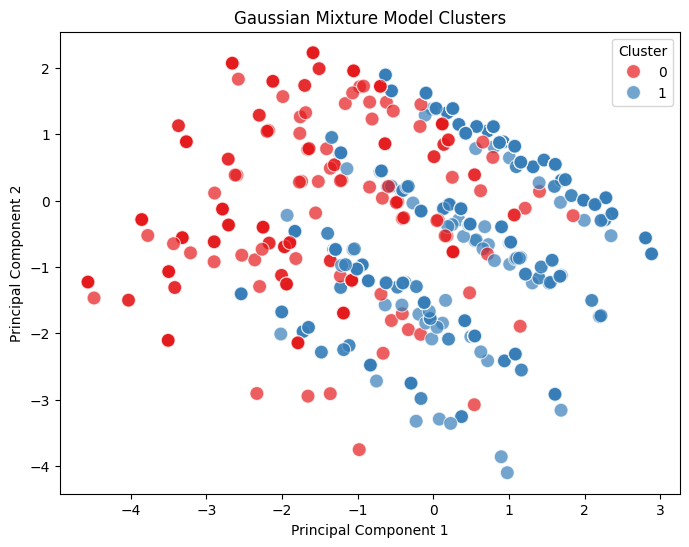

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming 'mcdonalds' is your pandas DataFrame
# Extracting the first 11 columns (adjust based on the actual dataset)
columns = mcdonalds.columns[:11]
X = mcdonalds[columns]  # Selecting the relevant columns

# Step 1: Encode categorical variables (assuming 'Yes'/'No' are present in the dataset)
# Convert 'Yes' to 1 and 'No' to 0, for all columns in the dataset
X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# If you have other categorical columns like 'Gender', encode them as well
# Example: Encoding 'Gender' as 1 for 'Female' and 0 for 'Male'
if 'Gender' in X_encoded.columns:
    X_encoded['Gender'] = X_encoded['Gender'].map({'Female': 1, 'Male': 0})

# Step 2: Standardize the data (Normalize the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 3: Fit the Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Predict the labels (cluster assignments) for each point
labels = gmm.predict(X_scaled)

# Create a DataFrame with the predicted labels and the original data
mcdonalds['Cluster'] = labels

# Step 4: Reduce the dimensions of the data to 2 for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Plot the data points colored by their cluster assignments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=mcdonalds['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


<ipython-input-97-9fb9d6c3f5f0>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


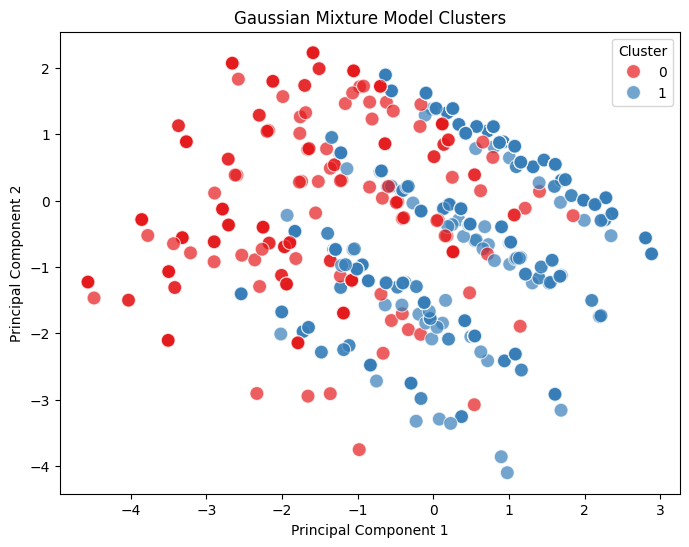

ANOVA result for significance between clusters on PC1: F_onewayResult(statistic=1387.797555723993, pvalue=1.0394601554448468e-213)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import f_oneway

# Assuming 'mcdonalds' is your pandas DataFrame and you are using the first 11 columns
columns = mcdonalds.columns[:11]
X = mcdonalds[columns]  # Selecting the relevant columns

# Step 1: Encode categorical variables (e.g., "Yes"/"No", "Male"/"Female")
# Assuming columns with categorical data are 'Gender' and others (you can extend this)
X_encoded = X.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))
if 'Gender' in X_encoded.columns:
    X_encoded['Gender'] = X_encoded['Gender'].map({'Female': 1, 'Male': 0})

# Step 2: Ensure all data is numeric, convert non-numeric to NaN if necessary
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, NaN for errors

# Step 3: Fill NaN values if there are any (e.g., fill with the mean of each column)
X_encoded = X_encoded.fillna(X_encoded.mean())

# Step 4: Standardize the data (important for GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 5: Fit the Gaussian Mixture Model (GMM) with 2 components
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X_scaled)

# Predict the labels (cluster assignments) for each point
labels = gmm.predict(X_scaled)

# Add the labels to the DataFrame
mcdonalds['Cluster'] = labels

# Step 6: Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Plot the data points colored by their cluster assignments
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=mcdonalds['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Gaussian Mixture Model Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 8: Perform an ANOVA to check if the cluster means differ significantly
anova_result = f_oneway(X_pca[mcdonalds['Cluster'] == 0, 0], X_pca[mcdonalds['Cluster'] == 1, 0])
print("ANOVA result for significance between clusters on PC1:", anova_result)

# Additional post-hoc testing can be done if necessary for detailed comparisons.


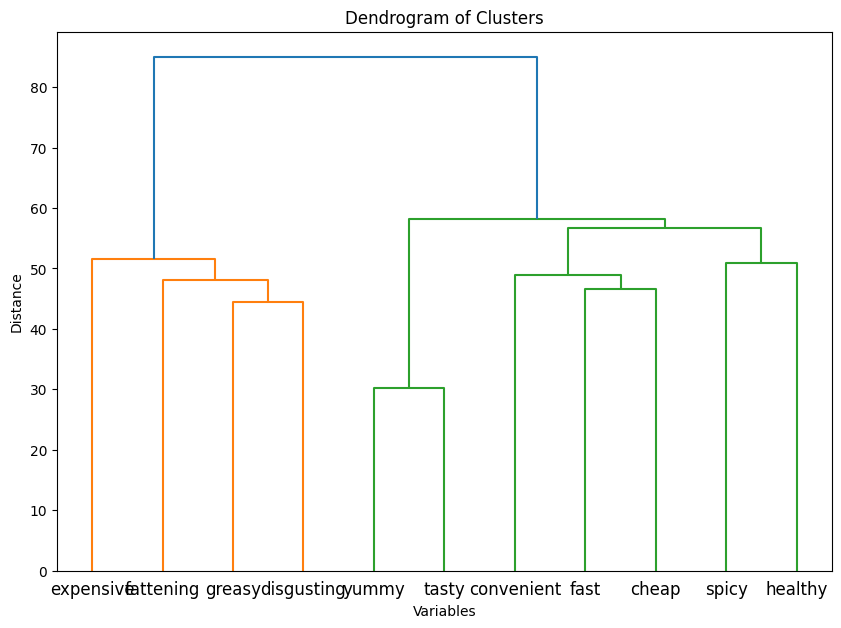

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Assuming 'mcdonalds' is your DataFrame
# Let's handle the categorical columns first
# Convert all categorical columns to numeric if necessary

# For example, if 'Gender' or 'Like' contains categorical strings ('Yes', 'No'), we can label encode them
# Identify categorical columns that need to be converted (for this example, assuming 'Gender' is categorical)

categorical_columns = mcdonalds.select_dtypes(include=['object']).columns

# Apply LabelEncoder to categorical columns
le = LabelEncoder()
for col in categorical_columns:
    mcdonalds[col] = le.fit_transform(mcdonalds[col])

# Select the relevant numeric columns
X = mcdonalds.iloc[:, :11]  # Selecting first 11 columns (you can adjust based on your dataset)

# Standardizing the data (important for GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the pairwise distance matrix (similar to dist(t(MD.x)) in R)
distance_matrix = pdist(X_scaled.T, metric='euclidean')

# Perform hierarchical clustering using the linkage function
Z = linkage(distance_matrix, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=X.columns)
plt.title("Dendrogram of Clusters")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()


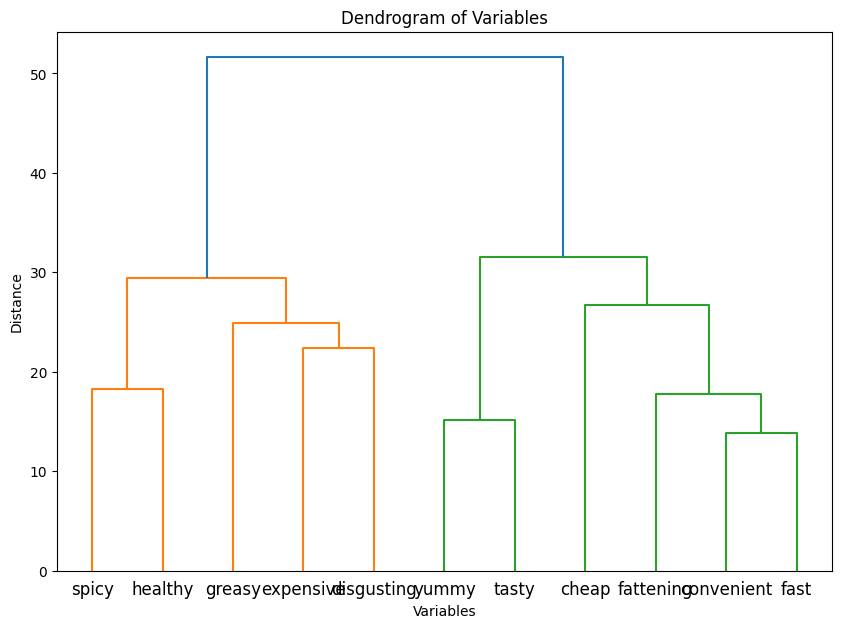

<ipython-input-99-9abd10d85505>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=mcdonalds, palette='Set1')


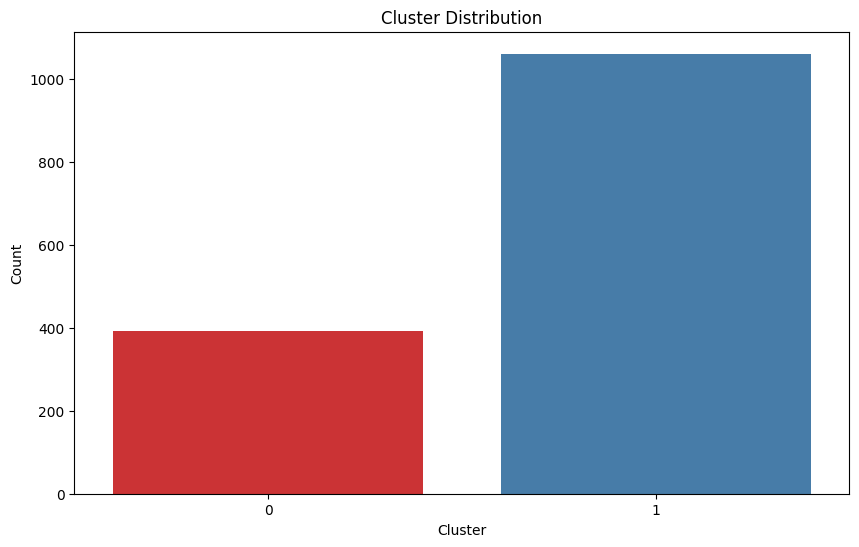

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# Assuming 'mcdonalds' DataFrame contains the data and 'k4' is the cluster assignments

# Assuming you've already run GMM clustering and have the clusters in 'k4'
# Use hierarchical clustering to get the order of the clusters
from scipy.spatial.distance import pdist

# Calculate the pairwise distance matrix (similar to dist(t(MD.x)) in R)
X_scaled = mcdonalds.iloc[:, :11].values  # Your relevant data columns (use appropriate columns)
distance_matrix = pdist(X_scaled.T, metric='euclidean')

# Perform hierarchical clustering using the linkage function
Z = linkage(distance_matrix, method='ward')

# Get the cluster order from hierarchical clustering (MD.vclust$order)
# Create a dendrogram to visualize the order of clusters
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=mcdonalds.columns[:11])  # Adjust to relevant columns if necessary
plt.title("Dendrogram of Variables")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()

# Now we will plot a bar chart similar to what `barchart(MD.k4)` would do in R
# Create a bar chart to visualize cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=mcdonalds, palette='Set1')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


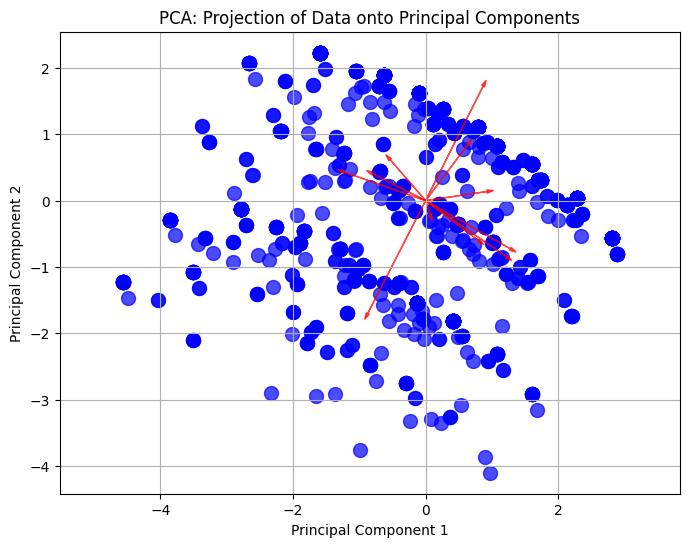

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'mcdonalds' DataFrame is already loaded and contains your data

# Step 1: Standardizing the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mcdonalds.iloc[:, :11])  # Select relevant columns (adjust as needed)

# Step 2: Perform PCA (similar to MD.pca in R)
pca = PCA(n_components=2)  # We are projecting to 2D
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot the data (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.7, s=100)
plt.title('PCA: Projection of Data onto Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Step 4: Project the principal axes with longer arrows
arrow_scale = 3  # Factor to scale the arrows' length (adjust as needed)
for i in range(X_scaled.shape[1]):
    plt.arrow(0, 0, pca.components_[0, i] * arrow_scale, pca.components_[1, i] * arrow_scale,
              color='red', alpha=0.7, head_width=0.05, head_length=0.1)

# Step 5: Customize the plot (e.g., remove hull and simulation lines like in R)
plt.grid(True)
plt.axis('equal')  # To maintain aspect ratio as in R's plot
plt.show()


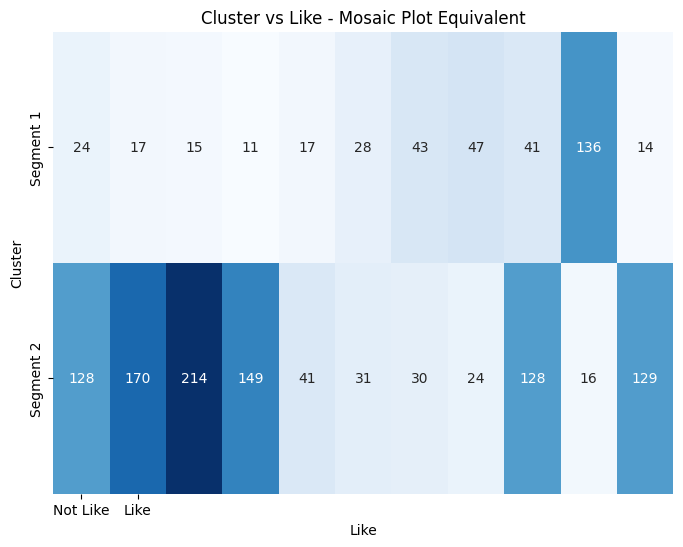

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'mcdonalds' is your pandas DataFrame and 'k4' are the cluster labels
# 'k4' is the output of the clustering model, and 'Like' is the target variable
k4 = mcdonalds['Cluster']  # Replace 'Cluster' with your actual cluster column name

# Create a contingency table between clusters and 'Like' (or the relevant column)
contingency_table = pd.crosstab(k4, mcdonalds['Like'])

# Plot a heatmap to visualize the relationship between clusters and 'Like'
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Like', 'Like'], yticklabels=[f'Segment {i}' for i in range(1, len(contingency_table)+1)])
plt.title('Cluster vs Like - Mosaic Plot Equivalent')
plt.xlabel('Like')
plt.ylabel('Cluster')
plt.show()


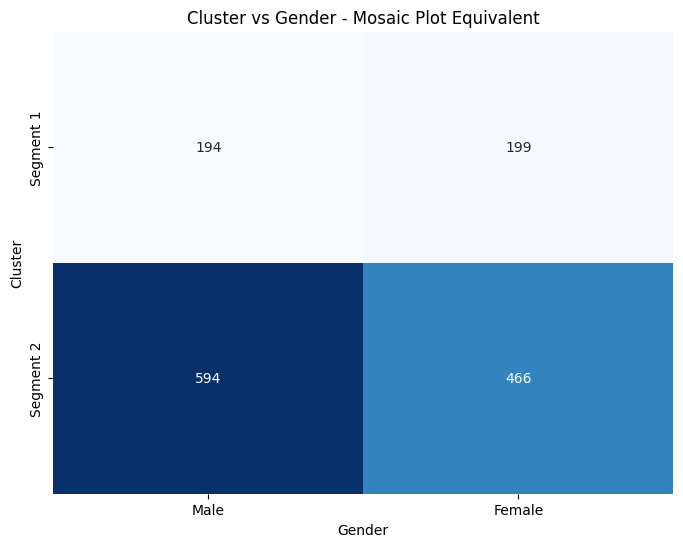

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'mcdonalds' is your pandas DataFrame and 'k4' are the cluster labels
# 'k4' is the output of the clustering model, and 'Gender' is the categorical variable
k4 = mcdonalds['Cluster']  # Replace 'Cluster' with your actual cluster column name

# Create a contingency table between clusters and 'Gender'
contingency_table_gender = pd.crosstab(k4, mcdonalds['Gender'])

# Plot a heatmap to visualize the relationship between clusters and 'Gender'
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_gender, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Male', 'Female'], yticklabels=[f'Segment {i}' for i in range(1, len(contingency_table_gender)+1)])
plt.title('Cluster vs Gender - Mosaic Plot Equivalent')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()


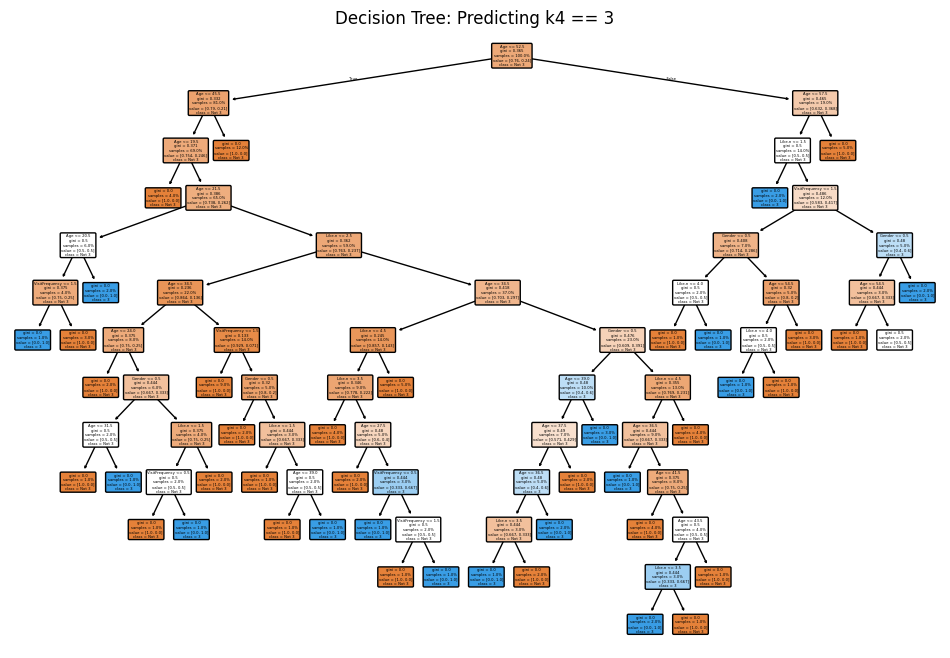

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Assuming 'mcdonalds' is your pandas DataFrame and 'k4' is the cluster column

# For demonstration, let's create a sample 'k4' and other features
# Replace with your actual dataset
mcdonalds = pd.DataFrame({
    'Like.n': np.random.choice([1, 2, 3, 4, 5], size=100),
    'Age': np.random.randint(18, 60, size=100),
    'VisitFrequency': np.random.choice(['Weekly', 'Monthly', 'Rarely'], size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'k4': np.random.choice([0, 1, 2, 3], size=100)
})

# Preprocessing: Encode categorical variables (Gender, VisitFrequency) as numbers
label_encoder = LabelEncoder()
mcdonalds['Gender'] = label_encoder.fit_transform(mcdonalds['Gender'])
mcdonalds['VisitFrequency'] = label_encoder.fit_transform(mcdonalds['VisitFrequency'])

# Define the target (whether k4 == 3)
mcdonalds['target'] = (mcdonalds['k4'] == 3).astype(int)

# Define the features
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]

# Define the target variable
y = mcdonalds['target']

# Build the decision tree model
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not 3', '3'], rounded=True, proportion=True)
plt.title('Decision Tree: Predicting k4 == 3')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'mcdonalds' is your pandas DataFrame

# For demonstration, let's create the sample 'mcdonalds' DataFrame
# Replace this with your actual dataset
mcdonalds = pd.DataFrame({
    'VisitFrequency': np.random.choice(['Weekly', 'Monthly', 'Rarely'], size=100),
    'k4': np.random.choice([0, 1, 2, 3], size=100)
})

# First, we need to convert the 'VisitFrequency' to numeric values
visit_map = {'Weekly': 3, 'Monthly': 2, 'Rarely': 1}
mcdonalds['VisitFrequency_num'] = mcdonalds['VisitFrequency'].map(visit_map)

# Now calculate the mean of 'VisitFrequency_num' for each 'k4' group
visit = mcdonalds.groupby('k4')['VisitFrequency_num'].mean()

# Display the result
print(visit)


k4
0    2.250000
1    2.138889
2    1.875000
3    2.125000
Name: VisitFrequency_num, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'mcdonalds' is your pandas DataFrame

# For demonstration, let's create the sample 'mcdonalds' DataFrame
# Replace this with your actual dataset
mcdonalds = pd.DataFrame({
    'Like.n': np.random.randint(1, 6, size=100),  # Assuming Like.n is a numerical column
    'k4': np.random.choice([0, 1, 2, 3], size=100)
})

# Calculate the mean of 'Like.n' for each group in 'k4'
like = mcdonalds.groupby('k4')['Like.n'].mean()

# Display the result
print(like)


k4
0    3.444444
1    3.137931
2    3.000000
3    3.068966
Name: Like.n, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'mcdonalds' is your pandas DataFrame

# For demonstration, let's create the sample 'mcdonalds' DataFrame
# Replace this with your actual dataset
mcdonalds = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'k4': np.random.choice([0, 1, 2, 3], size=100)
})

# Convert 'Gender' to binary: 1 for 'Female', 0 for 'Male'
mcdonalds['Gender_female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Calculate the mean of 'Gender_female' for each group in 'k4'
female = mcdonalds.groupby('k4')['Gender_female'].mean()

# Display the result
print(female)


k4
0    0.533333
1    0.562500
2    0.606061
3    0.523810
Name: Gender_female, dtype: float64


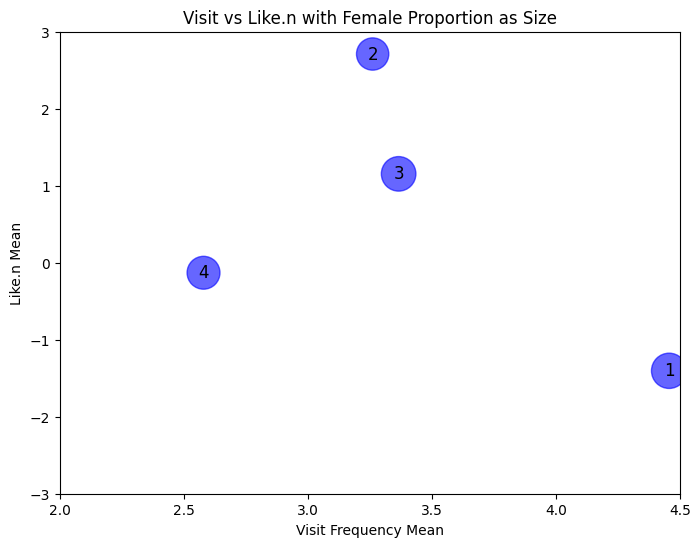

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'visit' and 'like' are already calculated
# For demonstration, let's create some sample values for visit, like, and female
visit = np.random.uniform(2, 4.5, 4)  # Sample visit values (mean of VisitFrequency per cluster)
like = np.random.uniform(-3, 3, 4)    # Sample like values (mean of Like.n per cluster)
female = np.random.uniform(0.2, 0.8, 4)  # Sample proportions of females per cluster

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot, size of points determined by female
plt.scatter(visit, like, s=10*female*100, c='blue', alpha=0.6)  # Scaling by 100 for visibility

# Add text labels
for i in range(4):
    plt.text(visit[i], like[i], str(i + 1), fontsize=12, ha='center', va='center')

# Set axis limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Set labels and title
plt.xlabel('Visit Frequency Mean')
plt.ylabel('Like.n Mean')
plt.title('Visit vs Like.n with Female Proportion as Size')

# Show the plot
plt.show()
